In [1]:
import numpy as np                 
import pandas as pd                
import matplotlib                  
import matplotlib.pyplot as plt      
import seaborn as sns                          
%matplotlib inline

In [2]:
df_sleep = pd.read_csv("14-DataA.csv")

In [3]:
df_sleep.head()

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
0,Female,2022-05-05 03:45:00,2022-05-05 12:30:00,0 days 08:45:00,Okay,1.25,5.5,2,True,True,61
1,Female,2022-05-05 23:15:00,2022-05-06 06:30:00,0 days 07:15:00,Okay,1.50,8.0,3,True,False,40
2,Male,2022-05-05 22:30:00,2022-05-06 06:00:00,0 days 07:30:00,Healthy,2.25,8.5,3,True,False,41
3,Male,2022-05-05 03:00:00,2022-05-05 17:00:00,0 days 14:00:00,Sick,2.50,7.5,3,True,False,42
4,Male,2022-05-05 00:15:00,2022-05-05 06:30:00,0 days 06:15:00,Okay,1.75,10.0,4,False,True,42


array([[<AxesSubplot:title={'center':'Screentime_before_sleep_hrs'}>,
        <AxesSubplot:title={'center':'Workhours'}>],
       [<AxesSubplot:title={'center':'Meal_intake'}>,
        <AxesSubplot:title={'center':'Sleep_Quality_%'}>]], dtype=object)

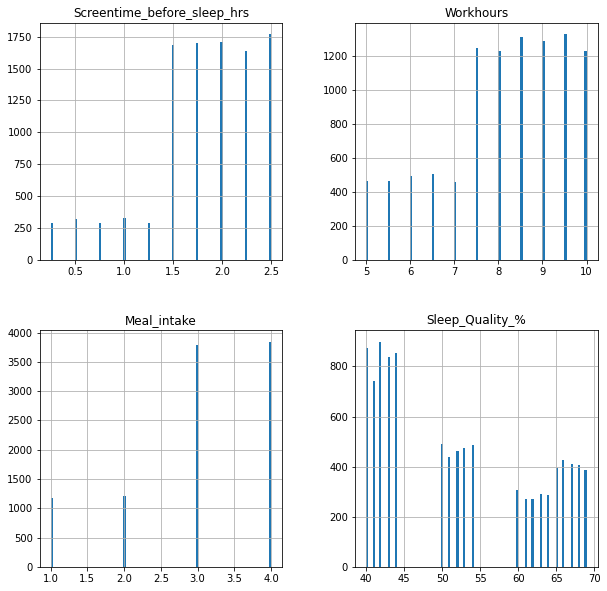

In [4]:
df_sleep.hist(bins=100, figsize=(10, 10))

## Describing the dataset

### Overall description

In [5]:
df_sleep.describe()

,Screentime_before_sleep_hrs,Workhours,Meal_intake,Sleep_Quality_%
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.815200,8.101100,3.029200,52.252600
std,0.570587,1.425914,0.986532,10.172529
min,0.250000,5.000000,1.000000,40.000000
25%,1.500000,7.500000,3.000000,42.000000
50%,2.000000,8.500000,3.000000,51.000000
75%,2.250000,9.500000,4.000000,63.000000
max,2.500000,10.000000,4.000000,69.000000


In [6]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       10000 non-null  object 
 1   Sleep_time                   10000 non-null  object 
 2   Wake_up_time                 10000 non-null  object 
 3   Sleep_duration               10000 non-null  object 
 4   Health_status                10000 non-null  object 
 5   Screentime_before_sleep_hrs  10000 non-null  float64
 6   Workhours                    10000 non-null  float64
 7   Meal_intake                  10000 non-null  int64  
 8   Smoking                      10000 non-null  bool   
 9   Drinking                     10000 non-null  bool   
 10  Sleep_Quality_%              10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 722.8+ KB


## Column wise description

In [7]:
for i in df_sleep.columns:
    print(i + ":")
    print(f"Datatype : {type(df_sleep[i])}")
    print(df_sleep[i].describe())
    print("###################################################################################")
    print("")

Gender:
Datatype : <class 'pandas.core.series.Series'>
count     10000
unique        3
top        Male
freq       4977
Name: Gender, dtype: object
###################################################################################

Sleep_time:
Datatype : <class 'pandas.core.series.Series'>
count                   10000
unique                     40
top       2022-05-05 18:15:00
freq                      282
Name: Sleep_time, dtype: object
###################################################################################

Wake_up_time:
Datatype : <class 'pandas.core.series.Series'>
count                   10000
unique                     64
top       2022-05-06 04:30:00
freq                      421
Name: Wake_up_time, dtype: object
###################################################################################

Sleep_duration:
Datatype : <class 'pandas.core.series.Series'>
count               10000
unique                 36
top       0 days 05:15:00
freq                  419
Name:

## Domains of values

In [8]:
for i in df_sleep.columns:
    print(f"{i} : ({df_sleep[i].min()}, {df_sleep[i].max()})")
    print("")

Gender : (Female, undisclosed)

Sleep_time : (2022-05-05 00:00:00, 2022-05-05 23:45:00)

Wake_up_time : (2022-05-05 04:00:00, 2022-05-06 14:30:00)

Sleep_duration : (0 days 04:00:00, 0 days 14:45:00)

Health_status : (Healthy, Sick)

Screentime_before_sleep_hrs : (0.25, 2.5)

Workhours : (5.0, 10.0)

Meal_intake : (1, 4)

Smoking : (False, True)

Drinking : (False, True)

Sleep_Quality_% : (40, 69)



## Finding Anomalies and Patterns in Dataset

### Gender

In [9]:
gender = df_sleep.Gender
gender.head()

0    Female
1    Female
2      Male
3      Male
4      Male
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

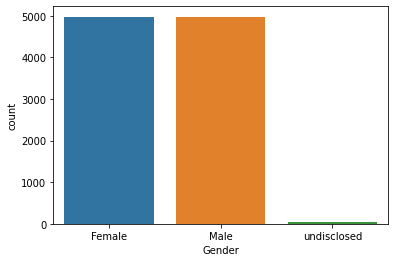

In [60]:
sns.countplot(data=gender, x=gender)
# Number of instances for Female and Male are same but for undisclosed it is very less

Male and Female has the same instance but Undisclosed attribute has very less instances

### Health Status

In [11]:
health_status = df_sleep.Health_status

In [12]:
health_status.head()

0       Okay
1       Okay
2    Healthy
3       Sick
4       Okay
Name: Health_status, dtype: object

<AxesSubplot:xlabel='Health_status', ylabel='count'>

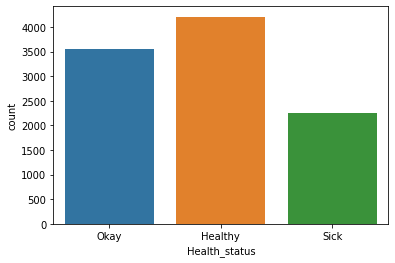

In [61]:
sns.countplot(data=health_status, x=health_status)

Number of instances of Sick people are almost half of that of Healthy people

### Screen time before sleep hours

In [14]:
screen_time = df_sleep.Screentime_before_sleep_hrs
screen_time.head()

0    1.25
1    1.50
2    2.25
3    2.50
4    1.75
Name: Screentime_before_sleep_hrs, dtype: float64

#### Anomaly Detection in Screen_time

##### Using Quartile deviation method

In [15]:
Q1 = screen_time.quantile(0.2)
Q3 = screen_time.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(1.5, 2.25, 0.75)

In [16]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [17]:
outliers = []
for i in screen_time:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
outliers = np.array(outliers)
print(f"Detected Outliers in the data : {np.unique(outliers)}")

Detected Outliers in the data : [0.25]


##### Using box-plot method

<AxesSubplot:>

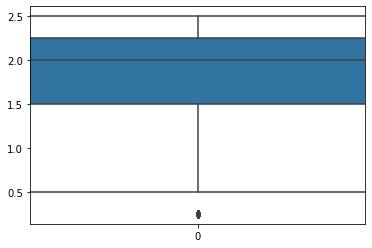

In [18]:
sns.boxplot(data=screen_time, width=5)
# we can see the outlier in the graph, which is 0.25

Outlier detected at o.25

#### Pattern Detection

<AxesSubplot:>

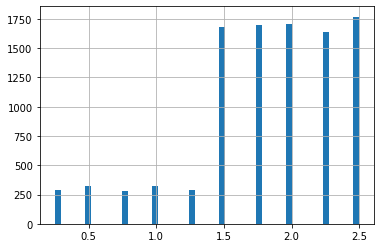

In [19]:
screen_time.hist(bins=50)
# Number of instances for [0.25, 1.25] is much less then [1.5, 2.5]

Half of the attributes of this data has approximately 20% distribution whereas other half has 80%

### Workhours

In [20]:
workhours = df_sleep.Workhours
workhours.head()

0     5.5
1     8.0
2     8.5
3     7.5
4    10.0
Name: Workhours, dtype: float64

#### Anomaly Detection in Workhours

##### Using mean and standard deviation method

In [21]:
mean = np.mean(workhours)
std = np.std(workhours)
upper = mean + 2*std
lower = abs(mean - 2*std)
mean, std, lower, upper

(8.1011, 1.4258431856273677, 5.249413628745265, 10.952786371254735)

In [22]:
outliers = []
for i in workhours:
    if i>upper or i<lower:
        outliers.append(i)
print(f"Detected Outliers in the data : {np.unique(np.array(outliers))}")

Detected Outliers in the data : [5.]


In [23]:
workhours.unique()

array([ 5.5,  8. ,  8.5,  7.5, 10. ,  6.5,  9.5,  5. ,  9. ,  6. ,  7. ])

##### Using box-plot method

<AxesSubplot:>

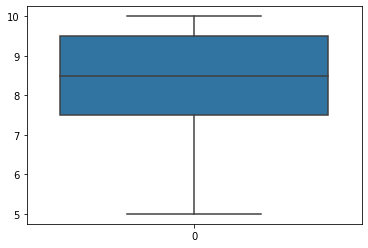

In [24]:
sns.boxplot(data=workhours)
#It detects no outliers

Due to dilemma in detecting outliers, hence I can't conclude anything

#### Pattern Detection

<AxesSubplot:xlabel='Workhours'>

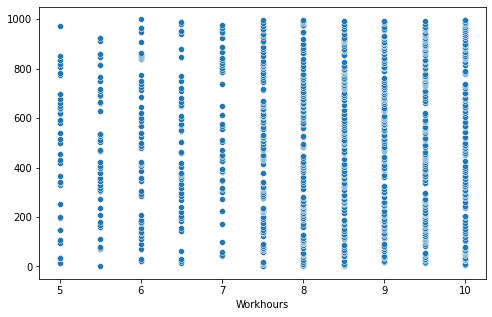

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=workhours, x=workhours[:1000], y=range(1000))

Scatterplot of the column shows some uneven distribution of instances

<AxesSubplot:>

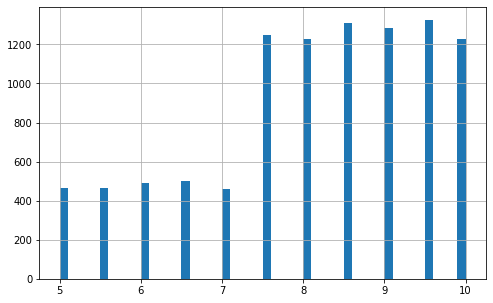

In [27]:
workhours.hist(bins=50, figsize=(8, 5))

Almost half of the attributes of this data has approximately 30% distribution whereas other half has 70%

### Meal Intake

In [28]:
meal = df_sleep.Meal_intake
meal.head()

0    2
1    3
2    3
3    3
4    4
Name: Meal_intake, dtype: int64

In [29]:
meal.unique()

array([2, 3, 4, 1], dtype=int64)

<AxesSubplot:>

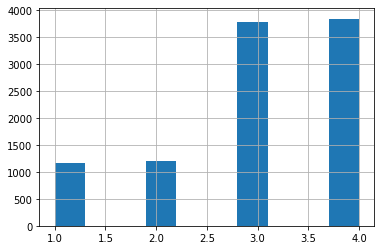

In [30]:
meal.hist()

Half of the attributes of this data has approximately 25% distribution whereas other half has 75%

### Sleep Quality

In [31]:
sleep_qu = df_sleep["Sleep_Quality_%"]
sleep_qu.head()

0    61
1    40
2    41
3    42
4    42
Name: Sleep_Quality_%, dtype: int64

In [32]:
sleep_qu.unique()

array([61, 40, 41, 42, 43, 52, 66, 62, 67, 53, 60, 54, 68, 63, 44, 65, 69,
       50, 51, 64], dtype=int64)

#### Anomaly Detection

##### Using Quartile Deviation Method

In [33]:
Q1 = sleep_qu.quantile(0.2)
Q3 = sleep_qu.quantile(0.8)
IQR = Q3-Q1
Q1, Q3, IQR

(42.0, 65.0, 23.0)

In [34]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [35]:
lower_limit, upper_limit

(7.5, 99.5)

In [36]:
outliers = []
for i in sleep_qu:
    if i<lower_limit or i>upper_limit:
        outliers.append(i)
outliers = np.array(outliers)
print(f"Detected Outliers in the data : {np.unique(outliers)}")

Detected Outliers in the data : []


In [37]:
# no anomaly detected in Sleep Quality column

#### Pattern Detection

<AxesSubplot:>

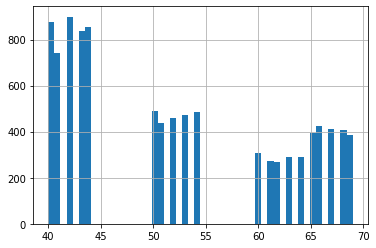

In [38]:
sleep_qu.hist(bins=50)

Data for 45-50, 55-60 are missing, hence making it unevenly distributed column

<AxesSubplot:xlabel='Sleep_Quality_%'>

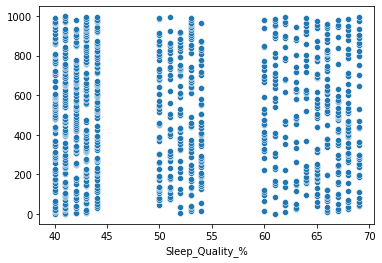

In [39]:
sns.scatterplot(data=sleep_qu, x=sleep_qu[:1000], y=range(1000))

Scatterplot for the same shows the same thing, i.e., Data for 45-50, 55-60 are missing, hence making it unevenly distributed column

## Pattern Detected in, Screentime_before_sleep_hrs, Meal_intake, and Workhours
The initial values of the columns have less instances in comparison to other half instances.

# Relationship in this Dataset

### Pearson


In [40]:
df_sleep.corr(method="pearson")

,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
Screentime_before_sleep_hrs,1.000000,-0.012144,-0.015775,0.004179,0.008688,-0.000546
Workhours,-0.012144,1.000000,0.708638,0.102157,0.111822,0.009009
Meal_intake,-0.015775,0.708638,1.000000,0.102252,0.114265,0.002115
Smoking,0.004179,0.102157,0.102252,1.000000,0.068611,-0.004321
Drinking,0.008688,0.111822,0.114265,0.068611,1.000000,-0.001921
Sleep_Quality_%,-0.000546,0.009009,0.002115,-0.004321,-0.001921,1.000000


### Kendall
Kendall's Tau = (C – D / C + D)

In [41]:
df_sleep.corr(method="kendall")

,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
Screentime_before_sleep_hrs,1.000000,-0.113486,-0.326645,-0.522013,-0.519623,-0.057235
Workhours,-0.113486,1.000000,0.045106,-0.472975,-0.467828,-0.053593
Meal_intake,-0.326645,0.045106,1.000000,-0.477256,-0.471147,-0.058013
Smoking,-0.522013,-0.472975,-0.477256,1.000000,-0.504162,-0.058648
Drinking,-0.519623,-0.467828,-0.471147,-0.504162,1.000000,-0.057032
Sleep_Quality_%,-0.057235,-0.053593,-0.058013,-0.058648,-0.057032,1.000000


### Spearman

In [42]:
df_sleep.corr(method="spearman")

,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
Screentime_before_sleep_hrs,1.000000,-0.009137,-0.014636,0.002276,0.008772,0.001033
Workhours,-0.009137,1.000000,0.581522,0.093102,0.102559,0.008341
Meal_intake,-0.014636,0.581522,1.000000,0.093525,0.105409,0.004007
Smoking,0.002276,0.093102,0.093525,1.000000,0.068611,-0.003914
Drinking,0.008772,0.102559,0.105409,0.068611,1.000000,0.002667
Sleep_Quality_%,0.001033,0.008341,0.004007,-0.003914,0.002667,1.000000


#### Two correlation methods shows that Workhours and Meal_intake are somehow related

## Finding Identifier

In [43]:
dfr = df_sleep.copy()

In [44]:
dfr.head()

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%
0,Female,2022-05-05 03:45:00,2022-05-05 12:30:00,0 days 08:45:00,Okay,1.25,5.5,2,True,True,61
1,Female,2022-05-05 23:15:00,2022-05-06 06:30:00,0 days 07:15:00,Okay,1.50,8.0,3,True,False,40
2,Male,2022-05-05 22:30:00,2022-05-06 06:00:00,0 days 07:30:00,Healthy,2.25,8.5,3,True,False,41
3,Male,2022-05-05 03:00:00,2022-05-05 17:00:00,0 days 14:00:00,Sick,2.50,7.5,3,True,False,42
4,Male,2022-05-05 00:15:00,2022-05-05 06:30:00,0 days 06:15:00,Okay,1.75,10.0,4,False,True,42


### Try-1

In [45]:
gen_identifier = []
for i in range(10000):
    gen_identifier.append(dfr["Screentime_before_sleep_hrs"][i]*dfr["Workhours"][i]*dfr["Sleep_Quality_%"][i])

In [46]:
len(np.unique(np.array(gen_identifier)))        #try-1 failed

1082

Trying to find identifier using Screentime_before_sleep_hrs, Workhours, and Sleep Quality

Mathematical Description:
Identifier = Screentime_before_sleep_hrs * Workhours * Sleep Quality

### Try-2

In [47]:
len(dfr["Sleep_time"].unique())

40

In [48]:
s1 = pd.to_datetime(dfr.Sleep_time)
s1.head()

0   2022-05-05 03:45:00
1   2022-05-05 23:15:00
2   2022-05-05 22:30:00
3   2022-05-05 03:00:00
4   2022-05-05 00:15:00
Name: Sleep_time, dtype: datetime64[ns]

In [49]:
def to_integer(datetime):
    return 1000*datetime.year + 100*datetime.month + 10*datetime.day

In [50]:
identifier = []
for i in range(10000):
    identifier.append(to_integer(s1[i])*(dfr["Workhours"] - dfr["Screentime_before_sleep_hrs"])) #test failed

By using Sleep_time and converting it into integer, with Workhours and Screentime before sleep hours

Mathematical Description:
Identifier = int(sleep_time) * Workhours * Screentime_before_sleep_hrs

### Try-3

In [51]:
import random

In [52]:
identifier = []
for i in range(10000):
    string = random.choice(dfr["Health_status"][i]) + random.choice(dfr["Gender"][i]) + random.choice(dfr["Health_status"][i])+ random.choice(dfr["Health_status"][i]) + random.choice(dfr["Health_status"][i]) + str(int(dfr["Sleep_Quality_%"][i]*dfr["Workhours"][i]*dfr["Screentime_before_sleep_hrs"][i]*random.randint(dfr["Meal_intake"][i], dfr["Meal_intake"][i]*10)))
    identifier.append(string)

In [53]:
len(np.unique(identifier))

9998

In [54]:
identifier[:10]

['kFOkO838',
 'yFkak12000',
 'tMtHH21955',
 'kakci22837',
 'Oeaka5145',
 'eFHye4568',
 'Oeyya15159',
 'yFtyy26000',
 'yekaO17325',
 'aMeal21700']

By using the random method to choosse the random letters from the columns:
Still can't find the appropriate identifier for this dataset.
Used Health_status, Gender, Sleep_quality, Workhours, Screentime_before_sleep_hrs, Meal_intake

Mathematical Description:
Identifier = random(health_status[index]) + random(gender[index]) + random(health_status[index]) + random(health_status[index]) + random(health_status[index]) + sleep quality + workhours + meal intake

In [56]:
Id = pd.DataFrame(identifier, columns=["Id"])

In [57]:
dfFinal = df_sleep.copy()

In [58]:
dfFinal["Id"] = Id

In [59]:
dfFinal

,Gender,Sleep_time,Wake_up_time,Sleep_duration,Health_status,Screentime_before_sleep_hrs,Workhours,Meal_intake,Smoking,Drinking,Sleep_Quality_%,Id
0,Female,2022-05-05 03:45:00,2022-05-05 12:30:00,0 days 08:45:00,Okay,1.25,5.5,2,True,True,61,kFOkO838
1,Female,2022-05-05 23:15:00,2022-05-06 06:30:00,0 days 07:15:00,Okay,1.50,8.0,3,True,False,40,yFkak12000
2,Male,2022-05-05 22:30:00,2022-05-06 06:00:00,0 days 07:30:00,Healthy,2.25,8.5,3,True,False,41,tMtHH21955
3,Male,2022-05-05 03:00:00,2022-05-05 17:00:00,0 days 14:00:00,Sick,2.50,7.5,3,True,False,42,kakci22837
4,Male,2022-05-05 00:15:00,2022-05-05 06:30:00,0 days 06:15:00,Okay,1.75,10.0,4,False,True,42,Oeaka5145
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,2022-05-05 19:15:00,2022-05-06 01:30:00,0 days 06:15:00,Healthy,2.25,10.0,3,False,True,52,ylyHt26910
9996,Female,2022-05-05 18:15:00,2022-05-06 05:30:00,0 days 11:15:00,Sick,2.25,7.5,3,True,True,67,iakkS15828
9997,Male,2022-05-05 21:00:00,2022-05-06 03:00:00,0 days 06:00:00,Healthy,2.50,6.0,2,True,True,69,hMaHy11385
9998,Female,2022-05-05 19:00:00,2022-05-06 01:00:00,0 days 06:00:00,Healthy,2.00,7.5,3,True,True,40,llHay16200
